# Lego Analysis

Small analysis of Lego Dataset - mostly to exercise how to combine data and retrieve informations. \
Data from https://rebrickable.com/downloads/
## 💪 Challenge
Create a report to summarize your findings. Include:

1. What is the average number of Lego sets released per year?
2. What is the average number of Lego parts per year?
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?
5. What are the 5 most popular colors used in Lego parts?
6. What proportion of Lego parts are transparent?
8. What are the 5 rarest lego bricks?
9. When first transparent bricks were used? What colors became transparent through time?
10. Summarize your findings.


In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Prepare colors_table

In [2]:
colors_table = pd.read_csv('data\colors.csv.gz')
print(colors_table.head())
print('shape:', colors_table.shape)
print('unique names:', colors_table['name'].nunique())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f
shape: (267, 4)
unique names: 267


In [3]:
colors_table['is_trans_2'] = colors_table['is_trans'] == 't'
colors_table.drop('is_trans', axis='columns', inplace=True)
colors_table.rename(columns={'is_trans_2': 'is_trans'}, inplace=True)
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


In [4]:
print('unique names:', colors_table['is_trans'].unique())

unique names: [False  True]


In [5]:
colors_table.head()

,id,name,rgb,is_trans
0,-1,[Unknown],0033B2,False
1,0,Black,05131D,False
2,1,Blue,0055BF,False
3,2,Green,237841,False
4,3,Dark Turquoise,008F9B,False


Prepare elements

In [6]:
elements_table = pd.read_csv('data\elements.csv.gz')
print(elements_table.head())
print('shape:', elements_table.shape)

   element_id       part_num  color_id  design_id
0     6443403  2277c01pr0009         1     2277.0
1     4566309           2564         0     2564.0
2     4275423          53657      1004    53657.0
3     6194308          92926        71    28967.0
4     6229123          26561         4    26561.0
shape: (95282, 4)


In [7]:
elements_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95282 entries, 0 to 95281
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   element_id  95282 non-null  int64  
 1   part_num    95282 non-null  object 
 2   color_id    95282 non-null  int64  
 3   design_id   70649 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ MB


## QUESTION 1:
1. What is the average number of Lego sets released per year?


In [8]:
sets_table = pd.read_csv('data\sets.csv.gz')
sets_table.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [9]:
sets_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23873 entries, 0 to 23872
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    23873 non-null  object
 1   name       23873 non-null  object
 2   year       23873 non-null  int64 
 3   theme_id   23873 non-null  int64 
 4   num_parts  23873 non-null  int64 
 5   img_url    23873 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [10]:
# more for questions 2 & 3
sets_table.loc[sets_table['num_parts'] == 0].shape

(5876, 6)

In [11]:
# more for questions 2 & 3
np.sort(sets_table['num_parts'].unique())

array([    0,     1,     2, ...,  9987, 10001, 11695], dtype=int64)

In [12]:
sets_table_year = sets_table.groupby('year').agg(Count=('theme_id', 'count')).sort_values(by='year').reset_index()
sets_table_year

,year,Count
0,1949,5
1,1950,6
2,1953,4
3,1954,14
4,1955,39
...,...,...
70,2021,1206
71,2022,1186
72,2023,1128
73,2024,1004


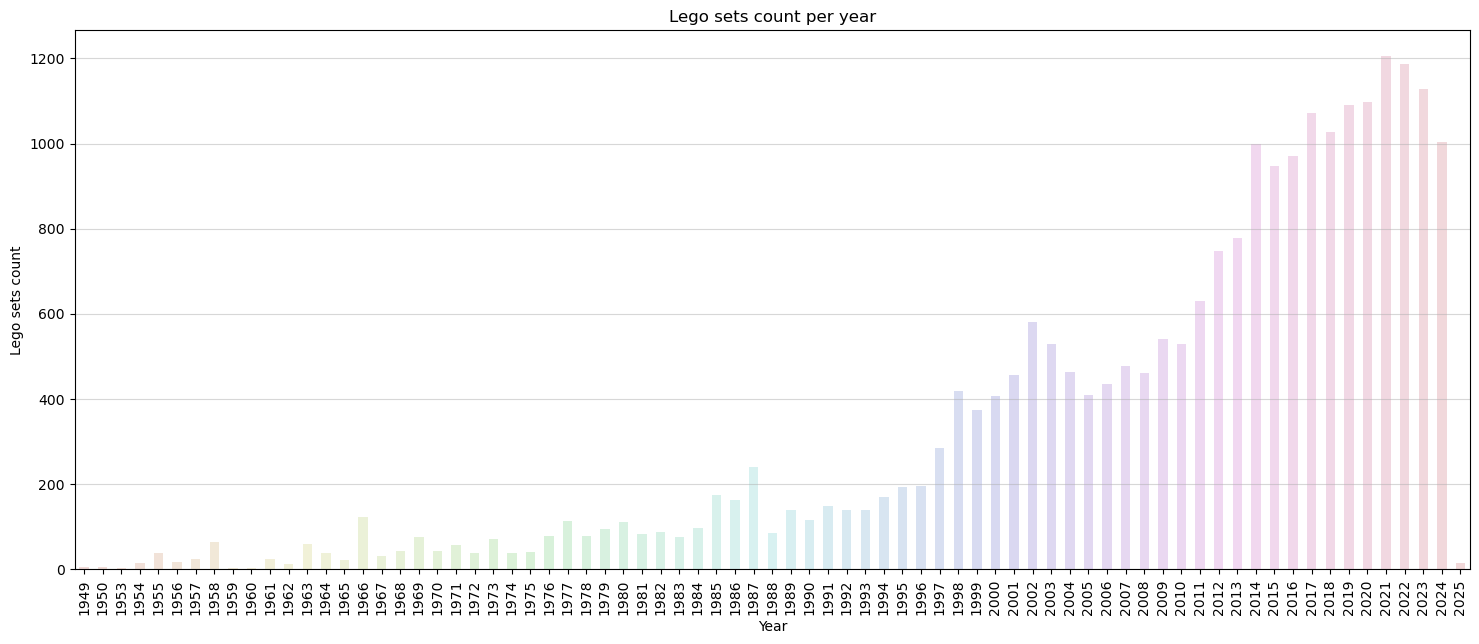

In [13]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(18,7))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_table_year, x='year', y='Count', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_table_year['year']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Lego sets count per year')
ax.set_ylabel('Lego sets count')
ax.set_xlabel('Year')
plt.show()

In [14]:
sets_table_year.loc[sets_table_year['year'] < 1960, 'decade'] = 1950 
for decade in range(1960, 2020, 10):
    sets_table_year.loc[np.logical_and(sets_table_year['year'] >= decade, sets_table_year['year'] < decade + 10), 'decade'] = decade 
sets_table_year.loc[sets_table_year['year'] >= 2020, 'decade'] = 2020 
sets_table_year.head()

,year,Count,decade
0,1949,5,1950.0
1,1950,6,1950.0
2,1953,4,1950.0
3,1954,14,1950.0
4,1955,39,1950.0


In [15]:
sets_table_year['decade'].unique()

array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.])

In [16]:
sets_tables_decade = sets_table_year.groupby('decade').agg(Count=('Count', 'sum')).sort_values(by='decade').reset_index()
sets_tables_decade['decade'] = sets_tables_decade['decade'].astype(int)
sets_tables_decade

,decade,Count
0,1950,179
1,1960,426
2,1970,652
3,1980,1252
4,1990,2177
5,2000,4761
6,2010,8790
7,2020,5636


In [17]:
sets_tables_decade['Avg'] = sets_tables_decade['Count'] / 10
sets_tables_decade.loc[sets_tables_decade['decade'] == 1950, 'Avg'] = sets_tables_decade.loc[sets_tables_decade['decade'] == 1950, 'Count'] / 11
sets_tables_decade.loc[sets_tables_decade['decade'] == 2020, 'Avg'] = sets_tables_decade.loc[sets_tables_decade['decade'] == 2020, 'Count'] / 5

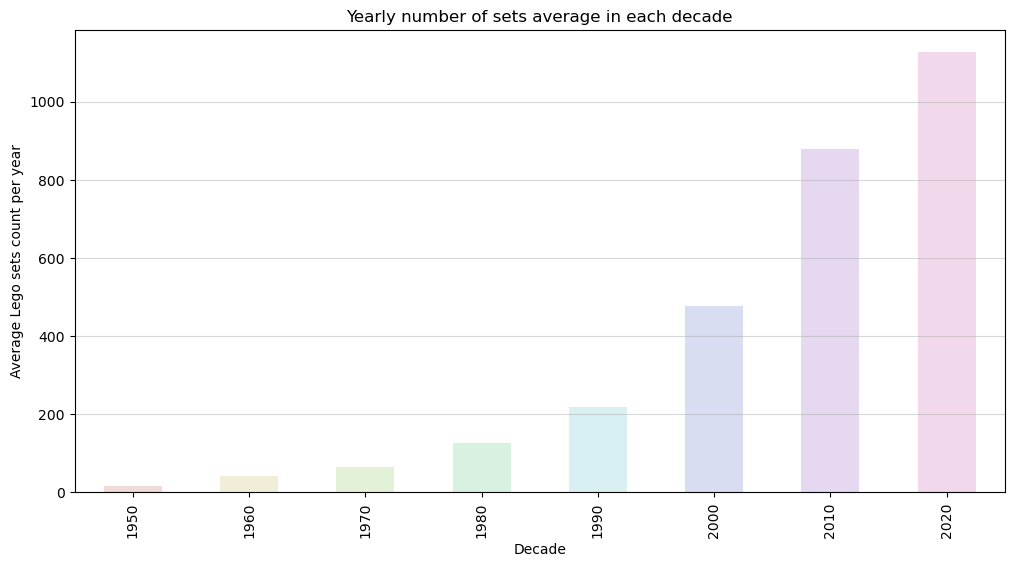

In [18]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.barplot(data = sets_tables_decade, x='decade', y='Avg', alpha=0.25, ax=ax, palette='hls', width=0.5, order=sets_tables_decade['decade']) 
ax.tick_params(axis='x', rotation=90)
ax.set_title('Yearly number of sets average in each decade')
ax.set_ylabel('Average Lego sets count per year')
ax.set_xlabel('Decade')
plt.show()

## QUESTION 2:
2. What is the average number of Lego parts per year?


In [84]:
inventories_df = pd.read_csv('data\inventories.csv.gz')
inventories_df.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [85]:
inventories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40462 entries, 0 to 40461
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       40462 non-null  int64 
 1   version  40462 non-null  int64 
 2   set_num  40462 non-null  object
dtypes: int64(2), object(1)
memory usage: 948.5+ KB


In [86]:
inventories_df.loc[inventories_df['version'] != 1].head()

,id,version,set_num
10601,16490,2,6515-1
10659,16878,2,8030-1
10742,17793,2,76081-1
10743,17799,2,214.6-1
10747,17848,2,421-2


In [87]:
inventories_df.loc[np.logical_and(inventories_df['version'] == 1, inventories_df['set_num'] == '421-2')].head()

,id,version,set_num
9138,14143,1,421-2


In [88]:
inventories_df.rename(columns={'id': 'inventory_id'}, inplace=True)

In [89]:
inventory_parts_df = pd.read_csv('data\inventory_parts.csv.gz')
inventory_parts_df.head()

,inventory_id,part_num,color_id,quantity,is_spare,img_url
0,1,48379c04,72,1,f,https://cdn.rebrickable.com/media/parts/photos...
1,1,48391,0,1,f,https://cdn.rebrickable.com/media/parts/photos...
2,1,48395,7,1,f,https://cdn.rebrickable.com/media/parts/photos...
3,1,48864c01,25,1,f,NaN
4,1,stickerupn0077,9999,1,f,NaN


In [90]:
inventory_parts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286599 entries, 0 to 1286598
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   inventory_id  1286599 non-null  int64 
 1   part_num      1286599 non-null  object
 2   color_id      1286599 non-null  int64 
 3   quantity      1286599 non-null  int64 
 4   is_spare      1286599 non-null  object
 5   img_url       1279381 non-null  object
dtypes: int64(3), object(3)
memory usage: 58.9+ MB


Check on same set num 421-2 if in different versions if there is any difference in parts count.

In [91]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 17848]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
532889,17848,3004,4,8,f,https://cdn.rebrickable.com/media/parts/elemen...
532890,17848,3005,4,6,f,https://cdn.rebrickable.com/media/parts/elemen...
532891,17848,3008,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...
532892,17848,3009,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...
532893,17848,3010,4,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [92]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 14143]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
448074,14143,3004,14,8,f,https://cdn.rebrickable.com/media/parts/elemen...
448075,14143,3005,14,6,f,https://cdn.rebrickable.com/media/parts/elemen...
448076,14143,3008,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...
448077,14143,3009,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...
448078,14143,3010,14,2,f,https://cdn.rebrickable.com/media/parts/elemen...


In [93]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 14143, 'quantity'].sum()

20

In [94]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 17848, 'quantity'].sum()

20

So it looks that version is different if the set was updated. So I will analyze only top versions of the set.

In [95]:
# check if minifigs parts are also in inventory parts
inventories_df.loc[inventories_df['set_num'] == 'fig-000555']

,inventory_id,version,set_num
16015,51370,1,fig-000555


In [96]:
inventory_parts_df.loc[inventory_parts_df['inventory_id'] == 51370]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
768290,51370,3626bpr0310,14,1,f,https://cdn.rebrickable.com/media/parts/photos...
768291,51370,4530,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...
768292,51370,970c03,0,1,f,https://cdn.rebrickable.com/media/parts/elemen...
768293,51370,973c22h01pr0173,4,1,f,https://cdn.rebrickable.com/media/parts/photos...


So, to be sure and certain and well count the distinction between spares and normal parts I need to add this inventory to the summary.

In [97]:
# inventory minifigs dataframe
inventory_minifigs_df = pd.read_csv('data\inventory_minifigs.csv.gz')
inventory_minifigs_df.head()

,inventory_id,fig_num,quantity
0,3,fig-001549,1
1,4,fig-000764,1
2,19,fig-000555,1
3,25,fig-000574,1
4,26,fig-000842,1


In [98]:
# number of unique set number
inventories_df['set_num'].nunique()

38716

In [99]:
a = sets_table['set_num'].nunique()
a

23873

In [100]:
b = inventories_df.loc[inventories_df['set_num'].str.match('fig'), 'set_num'].nunique()

In [101]:
a + b

38716

In [102]:
inventories_df.shape

(40462, 3)

Now, let's focus on dropping unnecessary versions.

In [103]:
# get only top versions for each set number and only inventories numbers for them
inventories_df['max_version'] = inventories_df.groupby('set_num')['version'].transform('max')
inventories_df.drop(inventories_df[inventories_df['max_version'] != inventories_df['version']].index, axis=0, inplace=True)
inventories_df.shape

(38716, 4)

OK, now we have inventories with only max version for each set and for each figure. Now, we want to add parts count as well as minifigures count to each set, and then match set with year when it was released. \
First, I will focus on parts count. I will add for each inventory line count of regular parts and count of spare parts.

In [104]:
parts_per_inventory = pd.pivot_table(inventory_parts_df, values='quantity', index=['inventory_id'], columns=['is_spare'], \
                                     aggfunc="sum", fill_value=0).reset_index()
parts_per_inventory.head()

is_spare,inventory_id,f,t
0,1,5,0
1,3,39,3
2,4,16,1
3,15,2,0
4,16,10,0


In [105]:
parts_per_inventory.rename(columns={'f': 'parts', 't': 'spares'}, inplace=True)
parts_per_inventory.head()

is_spare,inventory_id,parts,spares
0,1,5,0
1,3,39,3
2,4,16,1
3,15,2,0
4,16,10,0


In [83]:
parts_per_inventory.shape

(34363, 3)

In [106]:
inventories_df = inventories_df.merge(parts_per_inventory, on='inventory_id', how='left')
inventories_df.head()

,inventory_id,version,set_num,max_version,parts,spares
0,1,1,7922-1,1,5.0,0.0
1,3,1,3931-1,1,39.0,3.0
2,4,1,6942-1,1,16.0,1.0
3,15,1,5158-1,1,2.0,0.0
4,16,1,903-1,1,10.0,0.0


In [107]:
inventories_df.shape

(38716, 6)

In [108]:
inventory_minifigs_df_with_num_parts = inventory_minifigs_df.merge(inventories_df, left_on='fig_num', right_on='set_num')
inventory_minifigs_df_with_num_parts.head()

,inventory_id_x,fig_num,quantity,inventory_id_y,version,set_num,max_version,parts,spares
0,3,fig-001549,1,52364,1,fig-001549,1,4.0,0.0
1,4,fig-000764,1,51579,1,fig-000764,1,4.0,0.0
2,14589,fig-000764,1,51579,1,fig-000764,1,4.0,0.0
3,19,fig-000555,1,51370,1,fig-000555,1,4.0,0.0
4,25,fig-000574,1,51389,1,fig-000574,1,5.0,0.0


In [109]:
inventory_minifigs_df_with_num_parts['parts_total'] = inventory_minifigs_df_with_num_parts['quantity'] * inventory_minifigs_df_with_num_parts['parts']

In [110]:
inventory_minifigs_df_with_num_parts[inventory_minifigs_df_with_num_parts['spares'] != 0]

,inventory_id_x,fig_num,quantity,inventory_id_y,version,set_num,max_version,parts,spares,parts_total
16903,43641,fig-011590,1,106762,1,fig-011590,1,NaN,NaN,NaN


In [111]:
inventory_minifigs_df_with_num_parts.drop(columns=['inventory_id_y', 'set_num', 'max_version', 'parts', 'quantity', 'version', 'spares'], inplace=True)

In [112]:
inventory_minifigs_df_with_num_parts.rename(columns={'inventory_id_x': 'inventory_id'}, inplace=True)

In [113]:
inventory_minifigs_df_with_num_parts.head()

,inventory_id,fig_num,parts_total
0,3,fig-001549,4.0
1,4,fig-000764,4.0
2,14589,fig-000764,4.0
3,19,fig-000555,4.0
4,25,fig-000574,5.0


In [114]:
figs_per_inventory = pd.pivot_table(inventory_minifigs_df_with_num_parts, values='parts_total', index=['inventory_id'], \
                                     aggfunc=["sum", 'count'], fill_value=0).reset_index()
figs_per_inventory.head()

,inventory_id,sum,count
,,parts_total,parts_total
0,3,4.0,1
1,4,4.0,1
2,19,4.0,1
3,25,5.0,1
4,26,28.0,6


In [115]:
figs_per_inventory.columns = figs_per_inventory.columns.to_flat_index()
figs_per_inventory.columns

Index([('inventory_id', ''), ('sum', 'parts_total'), ('count', 'parts_total')], dtype='object')

In [116]:
figs_per_inventory.rename(columns={('inventory_id', ''): 'inventory_id', ('sum', 'parts_total'): 'fig_parts_sum', ('count', 'parts_total'): 'fig_count'}, inplace=True)
figs_per_inventory.head()

,inventory_id,fig_parts_sum,fig_count
0,3,4.0,1
1,4,4.0,1
2,19,4.0,1
3,25,5.0,1
4,26,28.0,6


In [117]:
inventories_df = inventories_df.merge(figs_per_inventory, on='inventory_id', how='left')
inventories_df.head()

,inventory_id,version,set_num,max_version,parts,spares,fig_parts_sum,fig_count
0,1,1,7922-1,1,5.0,0.0,NaN,NaN
1,3,1,3931-1,1,39.0,3.0,4.0,1.0
2,4,1,6942-1,1,16.0,1.0,4.0,1.0
3,15,1,5158-1,1,2.0,0.0,NaN,NaN
4,16,1,903-1,1,10.0,0.0,NaN,NaN


In [119]:
inventories_df.shape

(38716, 8)

In [118]:
inventory_parts_df.loc[(inventory_parts_df['inventory_id'] == 150237) & (inventory_parts_df['is_spare'] == 't')]

,inventory_id,part_num,color_id,quantity,is_spare,img_url
1071444,150237,2447,47,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071446,150237,24866,30,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071469,150237,34172,15,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071475,150237,3673,14,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071500,150237,53119,70,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071507,150237,6141,46,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071512,150237,64567,0,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071525,150237,93160,15,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071529,150237,98138,33,1,t,https://cdn.rebrickable.com/media/parts/elemen...
1071530,150237,98138pr0056,84,1,t,https://cdn.rebrickable.com/media/parts/elemen...


Create a column that sums all parts together - classic + figures parts.

In [120]:
inventories_df['total_parts'] = inventories_df['parts'] + inventories_df['fig_parts_sum']

In [121]:
inventories_df.columns

Index(['inventory_id', 'version', 'set_num', 'max_version', 'parts', 'spares',
       'fig_parts_sum', 'fig_count', 'total_parts'],
      dtype='object')

Columns explanation in inventories_df: \
'inventory_id' - inventory id \
'version' - version of set \
'set_num' - set number\
'max_version' - max version of set, used for filter data, no needed, now we analyze only sets with highest possible version\
'parts' - parts count (excluded minifigures parts and spares)\
'spares' - spares count\
'fig_parts_sum' - count of parts for all minifigures added in the set\
'fig_count' - number of minifigures in the set\
'total_parts' - total number of parts (parts + fig_parts_sum), excludes number of spare parts\
Still need to add year of the set to the DataFrame.

In [122]:
sets_table.head()

,set_num,name,year,theme_id,num_parts,img_url
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg
2,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg
3,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg
4,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg


In [126]:
inventories_df[inventories_df['set_num'] == '0011-3']

,inventory_id,version,set_num,max_version,parts,spares,fig_parts_sum,fig_count,total_parts
10962,24696,1,001-1,1,43.0,0.0,NaN,NaN,NaN


In [124]:
len(set(inventories_df['set_num']))

38716

In [125]:
len(set(sets_table['set_num']))

23873

<Axes: >

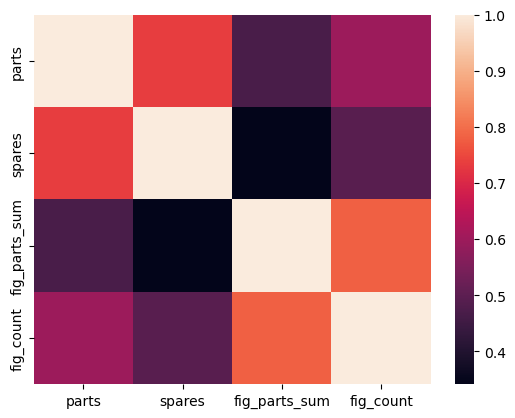

In [60]:
sns.heatmap(inventories_df[['parts', 'spares', 'fig_parts_sum', 'fig_count']].corr())

<Axes: xlabel='parts', ylabel='spares'>

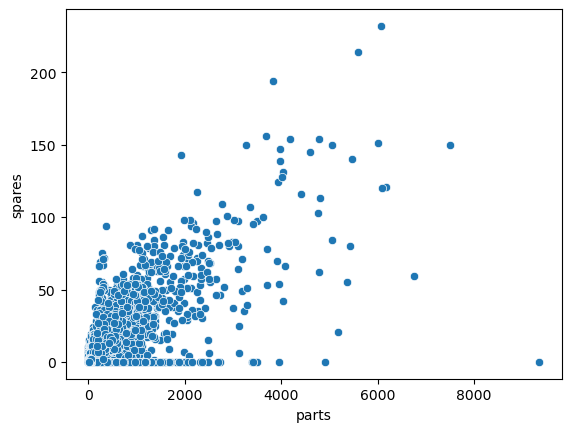

In [61]:
sns.scatterplot(data=inventories_df, x='parts', y='spares')

C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dom\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

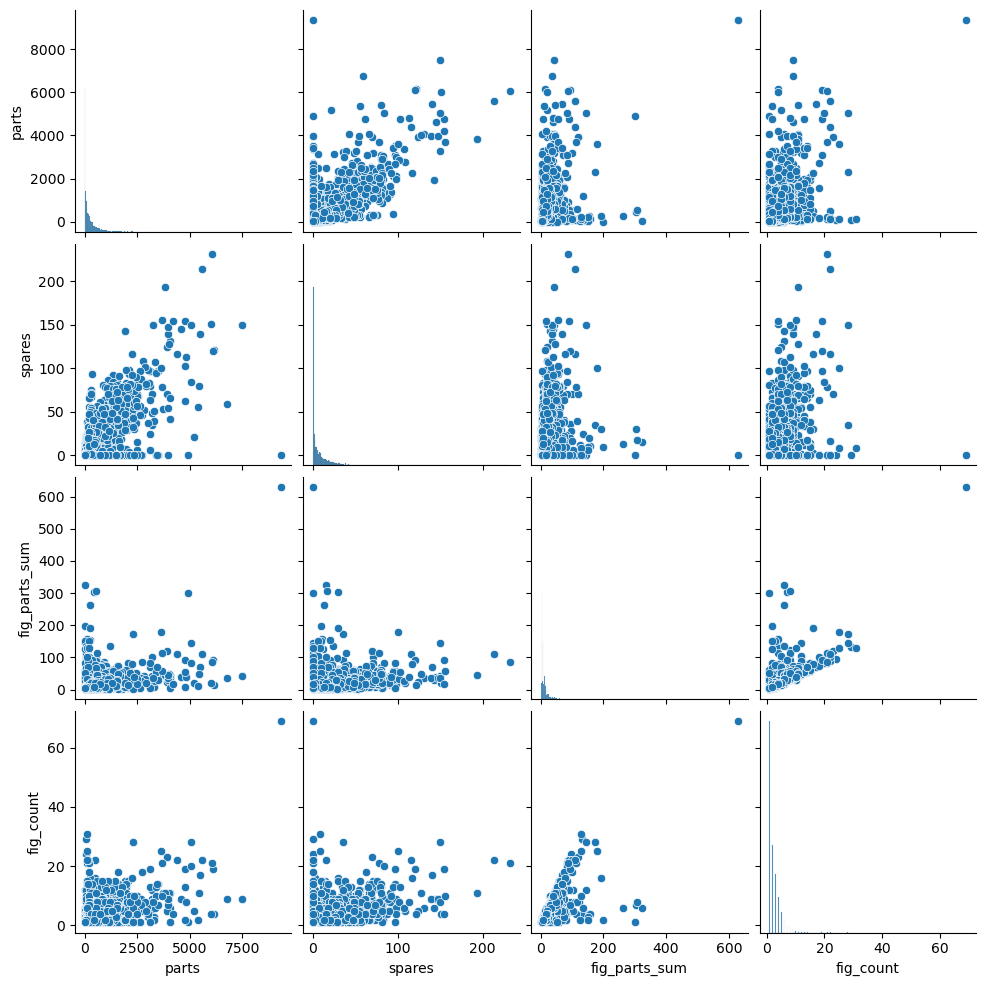

In [62]:
sns.pairplot(data=inventories_df[['parts', 'spares', 'fig_parts_sum', 'fig_count']])

In [63]:
inventories_df['fig_count'].value_counts()

fig_count
1     3760
2     1564
3     1049
4      639
5      364
6      256
7      142
8      103
9       57
10      25
12      18
11      18
13      13
15       9
14       9
22       6
21       4
16       3
19       3
18       3
28       2
25       2
17       1
31       1
29       1
69       1
23       1
24       1
20       1
Name: count, dtype: int64

In [64]:
inventories_df['parts'].value_counts()

parts
2       417
3       359
1       235
4       197
5       138
       ... 
2725      1
1202      1
911       1
940       1
2365      1
Name: count, Length: 1227, dtype: int64

In [69]:
inventories_df.loc[inventories_df['set_num'] == '60369-1'] # tractor : '60287-1' # Mobile Police Dog Training 60369

,inventory_id,version,set_num,max_version,parts,spares,fig_parts_sum,fig_count,total_parts
7002,150237,1,60369-1,1,188,10,9,2,197


In [ ]:
inventories_df = inventories_df.merge(sets_table, on='set_num')
inventories_df.head()

# TODO
Now I need to add minifigs to the dataframe.

In [ ]:
# TODO - fix table above -> first groupby inventory_id then merge with figs_quantity + first groupby figs quantity

In [ ]:
parts_per_set_year_df_2 = parts_per_set_year_df.groupby('set_num').agg(Parts_Count=('quantity', 'sum')).reset_index()
parts_per_set_year_df_2.head()

In [ ]:
parts_per_set_year_df_3 = parts_per_set_year_df_2.merge(sets_table, on='set_num')
parts_per_set_year_df_3.drop(columns=['img_url'], inplace=True)
parts_per_set_year_df_3.head()

In [ ]:
parts_df = pd.read_csv('data\parts.csv.gz')
parts_df.head()

In [ ]:
part_cat_df = pd.read_csv('data\part_categories.csv.gz')
part_cat_df.head()

In [ ]:
inventory_parts_df = inventory_parts_df.merge(parts_df, on='part_num')

In [ ]:
parts_per_set_year_df_3['difference'] = parts_per_set_year_df_3['Parts_Count'] - parts_per_set_year_df_3['num_parts']

In [ ]:
parts_per_set_year_df_3[parts_per_set_year_df_3['difference'] != 0]

In [ ]:
parts_per_set_year_df_3['difference'].describe()

In [ ]:
ax = sns.set_style(style=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.grid(axis='y', alpha=0.5)
sns.histplot(data = parts_per_set_year_df_3.loc[(parts_per_set_year_df_3['difference'] != 0) & (parts_per_set_year_df_3['num_parts'] != 0)], \
             x='difference', alpha=0.25, ax=ax, palette='hls') 
ax.set_title('Difference histogram')
ax.set_ylabel('Count')
ax.set_xlabel('Difference')
plt.show()

In [ ]:
parts_per_set_year_df_3.loc[parts_per_set_year_df_3['difference'] == 697]

In [ ]:
parts_per_set_year_df.info()

In [ ]:
np.sort(inventory_parts_df['part_num'].unique())

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1', 'quantity'].sum()

In [ ]:
sets_table.loc[sets_table['set_num'] == '60287-1']

In [ ]:
tractor_parts_desc = parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '60287-1'].merge(parts_df, on='part_num')
tractor_parts_desc

In [ ]:
tractor_parts_desc.drop(columns=['img_url', 'part_material'], inplace=True)
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc = tractor_parts_desc.merge(part_cat_df, left_on='part_cat_id', right_on='id')
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc.drop(columns=['part_cat_id', 'id'], inplace=True)
tractor_parts_desc.rename(columns={'name_x': 'part name', 'name_y': 'part category'}, inplace=True)
tractor_parts_desc.head()

In [ ]:
tractor_parts_desc['part category'].unique()

In [ ]:
tractor_parts_desc.loc[tractor_parts_desc['part category'].isin(['Plants and Animals', 'Plates Round Curved and Dishes'])]

In [ ]:
inventory_minifigs_df.loc[inventory_minifigs_df['inventory_id'] == 80991]

In [ ]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '60287-1') & (parts_per_set_year_df['is_spare'] == 't'), 'is_spare'].count()

In [ ]:
sets_table.loc[(sets_table['set_num'] == '60287-1')]

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1', 'quantity'].sum()

In [ ]:
parts_per_set_year_df.loc[parts_per_set_year_df['set_num'] == '10782-1']

In [ ]:
sets_table.loc[(sets_table['set_num'] == '10782-1')]

In [ ]:
inventories_df.loc[(inventories_df['set_num'] == '10782-1')]

In [ ]:
parts_per_set_year_df.loc[(parts_per_set_year_df['set_num'] == '10782-1') & (parts_per_set_year_df['is_spare'] == 't')]

In [ ]:
parts_per_set_year_df = parts_per_set_year_df.merge(sets_table, on='set_num')

In [ ]:
parts_per_set_year_df.head()

## QUESTION 3:
3. Are there any number of parts per set ranges? Like cheaper sets have 0-5 bricks in it or something like this.


## QUESTION 4:
4. Similar as 3 - what was average parts per set in 1950 and what is in 2020?

## QUESTION 5:
5. What are the 5 most popular colors used in Lego parts?


## QUESTION 6:
6. What proportion of Lego parts are transparent?



## QUESTION 7
7. When first transparent bricks were used? What colors became transparent through time?

## QUESTION 8:
8. What are the 5 rarest lego bricks?


## QUESTION 9:
9. Summarize your findings.